In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline 

warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Load datasets

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/lekki.csv', encoding='utf-8')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1818 entries, 0 to 1817
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1818 non-null   int64 
 1   tweets      1818 non-null   object
dtypes: int64(1), object(1)
memory usage: 28.5+ KB


In [ ]:
#remove pattern in the dataset
def remove_pattern(text):
  text = re.findall(pattern, df)
  for word in text:
    df = re.sub(word, "", df)
  
  return df
  df

In [ ]:
#create clean function
def cleantxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  text = re.sub(r'#', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?:\/\/\S+', '', text)
  text = re.sub(r'$', '', text)
  text = re.sub(r'\n', '', text)
  text = re.sub(r'0-9[A-Za-z]+', '', text)
  text = text.lower()
 


  return text
  
df['tweets'] = df['tweets'].apply(cleantxt)

df.head()

,Unnamed: 0,tweets
0,0,: do you need a unique logo design in 24hr del...
1,1,: do you need a unique logo design in 24hr del...
2,2,: do you need a unique logo design in 24hr del...
3,3,lekkimassacre wtf??
4,4,_yusuf_: na everybody dey advise nigerian yout...


In [ ]:
df['clean_text'] = df['tweets'].str.replace("[^a-zA-Z#]", " ")
df.head()

,Unnamed: 0,tweets,clean_text
0,0,: do you need a unique logo design in 24hr del...,do you need a unique logo design in hr del...
1,1,: do you need a unique logo design in 24hr del...,do you need a unique logo design in hr del...
2,2,: do you need a unique logo design in 24hr del...,do you need a unique logo design in hr del...
3,3,lekkimassacre wtf??,lekkimassacre wtf
4,4,_yusuf_: na everybody dey advise nigerian yout...,yusuf na everybody dey advise nigerian yout...


In [ ]:
#remove stop words
df['clean_text'] = df['clean_text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,Unnamed: 0,tweets,clean_text
0,0,: do you need a unique logo design in 24hr del...,need unique logo design delivery lekkimassacre...
1,1,: do you need a unique logo design in 24hr del...,need unique logo design delivery lekkimassacre...
2,2,: do you need a unique logo design in 24hr del...,need unique logo design delivery lekkimassacre...
3,3,lekkimassacre wtf??,lekkimassacre
4,4,_yusuf_: na everybody dey advise nigerian yout...,yusuf everybody advise nigerian youths suffer ...


In [ ]:
#tokenization
tokenized = df['clean_text'].apply(lambda x: x.split())
tokenized.head()

0    [need, unique, logo, design, delivery, lekkima...
1    [need, unique, logo, design, delivery, lekkima...
2    [need, unique, logo, design, delivery, lekkima...
3                                      [lekkimassacre]
4    [yusuf, everybody, advise, nigerian, youths, s...
Name: clean_text, dtype: object

In [ ]:
#stemming
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized = tokenized.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized.head()

0    [need, uniqu, logo, design, deliveri, lekkimas...
1    [need, uniqu, logo, design, deliveri, lekkimas...
2    [need, uniqu, logo, design, deliveri, lekkimas...
3                                       [lekkimassacr]
4    [yusuf, everybodi, advis, nigerian, youth, suf...
Name: clean_text, dtype: object

In [ ]:
df['clean_text'] = tokenized
df.head()

,Unnamed: 0,tweets,clean_text
0,0,: do you need a unique logo design in 24hr del...,"[need, uniqu, logo, design, deliveri, lekkimas..."
1,1,: do you need a unique logo design in 24hr del...,"[need, uniqu, logo, design, deliveri, lekkimas..."
2,2,: do you need a unique logo design in 24hr del...,"[need, uniqu, logo, design, deliveri, lekkimas..."
3,3,lekkimassacre wtf??,[lekkimassacr]
4,4,_yusuf_: na everybody dey advise nigerian yout...,"[yusuf, everybodi, advis, nigerian, youth, suf..."


In [ ]:
df['clean_text'] = df['tweets'].str.replace("[^a-zA-Z#]", " ")
df.head()

,Unnamed: 0,tweets,clean_text
0,0,: do you need a unique logo design in 24hr del...,do you need a unique logo design in hr del...
1,1,: do you need a unique logo design in 24hr del...,do you need a unique logo design in hr del...
2,2,: do you need a unique logo design in 24hr del...,do you need a unique logo design in hr del...
3,3,lekkimassacre wtf??,lekkimassacre wtf
4,4,_yusuf_: na everybody dey advise nigerian yout...,yusuf na everybody dey advise nigerian yout...


In [ ]:
#create a function to get subjectivity

from textblob import TextBlob

def getsubjectivity(text):
  return TextBlob(text).sentiment.subjectivity


#create a function to get polarity
def getpolarity(text):
  return TextBlob(text).sentiment.polarity

#create two new columns
df['subjectivity'] = df['tweets'].apply(getsubjectivity)
df['polarity'] = df['tweets'].apply(getpolarity)


#show new dataframe
df

In [ ]:
#sentiment text function
def getSentiment(score):
    if score < 0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
    
#add sentiment column to dataframe
df['sentiment'] = df['polarity'].apply(getSentiment)
df[200:500]

In [ ]:
#Visualization and exploration of dataset
allWords = ' '.join( [sentence for sentence in df['clean_text']] )

from wordcloud import WordCloud
wordCloud = WordCloud(width = 800, height = 500, random_state=42, max_font_size=100).generate(allWords)

#plot wordcloud
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

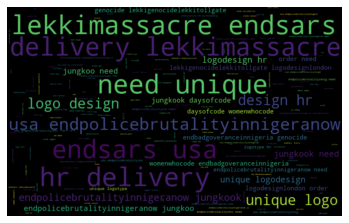

In [ ]:
#positive words visualization
allwords = " ".join([sentence for sentence in df['clean_text'][df['polarity'] > 0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(allwords)


#wordcloud

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

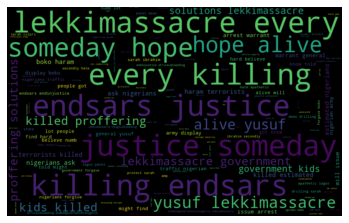

In [ ]:
#positive words visualization
allwords = " ".join([sentence for sentence in df['clean_text'][df['polarity'] < 0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(allwords)


#wordcloud

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

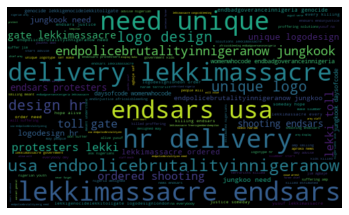

In [ ]:
#plot wordcloud 
allWords = ' '.join( [twts for twts in df['clean_text']] )
wordCloud = WordCloud(width = 500, height = 300, random_state=23, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

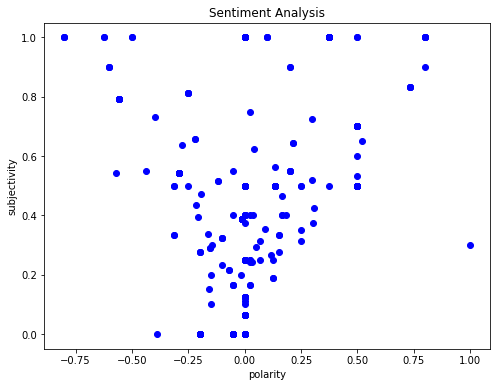

In [ ]:
#plot polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['polarity'][i], df['subjectivity'][i], color='Blue' )

plt.title('Sentiment Analysis')
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()

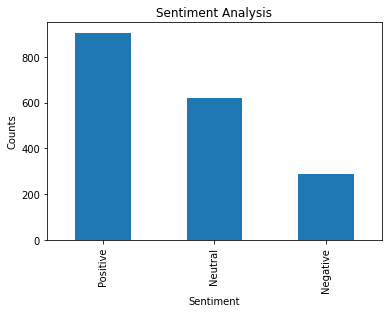

In [ ]:
#plot and visualize counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')

df['sentiment'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
#creating a label for the tweets
def createlabel(score):
  if score < 0:
    return -1
  elif score >0 and score < 1:
    return 1
  else:
    return 0


#add label top dataframe
df['label'] = df['polarity'].apply(createlabel)
df[200:215]

,Unnamed: 0,tweets,clean_text,subjectivity,polarity,sentiment,label
200,200,: ⛔ bishop oyedepo attacks feminism; tells wom...,bishop oyedepo attacks feminism tells wom...,0.214286,-0.071429,Negative,-1
201,201,⛔ bishop oyedepo attacks feminism; tells women...,bishop oyedepo attacks feminism tells women...,0.214286,-0.071429,Negative,-1
202,202,: who ordered the shooting of endsars proteste...,who ordered the shooting of endsars proteste...,0.000000,0.000000,Neutral,0
203,203,who ordered the shooting of endsars protesters...,who ordered the shooting of endsars protesters...,0.000000,0.000000,Neutral,0
204,204,: you can protest and all...... but it is what...,you can protest and all but it is what...,0.100000,-0.150000,Negative,-1
205,205,you can protest and all...... but it is what i...,you can protest and all but it is what i...,0.266667,0.116667,Positive,1
206,206,": el-bashir, just like gaddafi thought he was...",el bashir just like gaddafi thought he was...,0.500000,0.500000,Positive,1
207,207,: who ordered the shooting of endsars proteste...,who ordered the shooting of endsars proteste...,0.000000,0.000000,Neutral,0
208,208,: who ordered the shooting of endsars proteste...,who ordered the shooting of endsars proteste...,0.000000,0.000000,Neutral,0
209,209,: who ordered the shooting of endsars proteste...,who ordered the shooting of endsars proteste...,0.000000,0.000000,Neutral,0


In [ ]:
#input split and feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vect = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vect.fit_transform(df['clean_text'])

In [ ]:
# bow[0].toarray()

In [ ]:
bow

<1818x666 sparse matrix of type '<class 'numpy.int64'>'
	with 18102 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.30) 

In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1272, 666) (1272,) (546, 666) (546,)


In [ ]:
#model training

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [ ]:
# model training LR
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# testing LR
pred = model.predict(x_test)
accuracy_score(y_test, pred)

0.967032967032967

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

BNmodel = BernoulliNB(alpha = 2)
SVCmodel = LinearSVC()
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)


In [ ]:
# model training BNB
model1 = BernoulliNB()
model1.fit(x_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [ ]:
# testing BNB
model1.fit(x_test, y_test)
pred = model1.predict(x_test)
accuracy_score(y_test, pred)

0.9468864468864469

In [ ]:
# model training LSVC
model2 = LinearSVC()
model2.fit(x_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
# testing LSVC
model2.fit(x_test, y_test)
pred = model2.predict(x_test)
accuracy_score(y_test, pred)

In [ ]:
# use probabilty to get output
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:,1] >= 0.3
pred = pred.astype(np.int)

#f1_score(y_test, pred)
accuracy_score(y_test, pred)

In [ ]:
pred_prob[0]

In [ ]:
def models(model):
  y_pred = model.predict(x_test)

  accuracy = accuracy_score(y_pred, x_test['sentiment'])
  recall = recall_score(y_pred, x_test['sentiment'].pos_label='negative')
  precision = precision_score(y_pred, test['sentiment'].pos_label='negative')

  return (accuracy, recall, precision)